# Tarea 2

### Importante 1:
Este notebook está diseñado para ejecutar en Julia, si está trabajando en Python, genere un nuevo archivo ipynb para ejecutar Python y copie allí este archivo.

### Importante 2: ###
Renombre el archivo como: 
**nombredelgrupo_tarea_2.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de la tarea es variado:**

1. Familiarizarse con la ecuación de ondas o ecuaciones hiperbólicas en general.
2. Familiarizarse con los operadores diferencias finitas de distinto orden.
3. Ver la importancia en la elección del integrador temporal.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación. 
5. Estudiar convergencia de los métodos.  
6. Ver las limitaciones del método cuando se generan ondas de choque.


**1)**
Juegue con el código adjunto (Wave_equation): a) Cambie condiciones iniciales; b) evoluciones a distintos tiempos; c) grafique distintas variables o funciones de las mismas; d) intente graficar una animación de la solución; e) pruebe distintas resoluciones espaciales y temporales (que sucede si toma dt muy grande?) Explique. Calcule la energía de la solución y vea qué tan bien se conserva.

**2)** Cree operadores differencia finita de orden 6 y 8. Aplíquelos a la ecuación de onda. Juntos con los ya presentes (orden 2 y 4), evolucione las ecuaciones hasta T=100 y compare los resultados con la solución exacta
(al cabo de períodos enteros la solución exacta coincide con el dato inicial).
Haga un plot de las distintas aproximaciones. 






In [3]:
#import Pkg; Pkg.add("OrdinaryDiffEq");
using OrdinaryDiffEq;  #Esta es solo una parte del paquete DifferentialEquations
# import Pkg; Pkg.add("DifferentialEquations");
using DifferentialEquations;
using Plots;
using LinearAlgebra;
#import Pkg; Pkg.add("BandedMatrices");
using BandedMatrices;
using SparseArrays;
# import Pkg; Pkg.add("BenchmarkTools");
using BenchmarkTools;

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [17]:
include("../../modules/module_wave_equation_finite_differences.jl")

Q (generic function with 1 method)

In [18]:
Nx=300;                     # Numeros de puntos en la discretización espacial
L=1.0;                      # Intervalo espacial
dx=L/Nx;                    # dx
T=100.0;                    # Tiempo final
dt=1.0*dx;                  # Tomamos dt ≈ dx/speed_max, para mantener la condición CFL y
                            # Garantizar la estabilidad del algoritmo.
r0=zeros(Nx,2);             # Discretización de los campos u y v
x=[dx*i for i in 0:Nx-1];   # Coordenadas x, necesarias para determinar el dato inicial.

### Resolvemos para condicion inicial 1

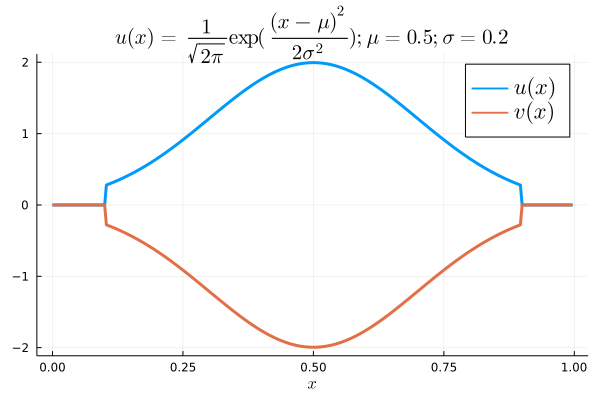

In [19]:
# parámetros iniciales
x0=0.1;x1=0.9;      # ventana
u = @view r0[:,1];
v = @view r0[:,2];

# definimos una función gaussiana para C.I.
function gaussian_function(x,σ,μ)
    return (1.0/(σ*sqrt(2*π)))*exp(-0.5*((x-μ)/σ)^2)
end

μ=0.5*L;σ=0.2;
for i in 1:Nx
    if ((x[i] > x0) && (x[i] < x1))
        u[i] = gaussian_function(x[i],σ,μ);
        v[i] = -u[i];
    end
end

plot(x,r0,label=["\$u(x)\$" "\$v(x)\$"],xlabel="\$x\$",legendfontsize=15,lw=3)
title!("\$u(x)=\\frac{1}{\\sqrt{2π}}\\exp(\\frac{(x-μ)^2}{2σ^2});μ=$(μ);σ=$(σ)\$")

In [23]:
# Resolvemos con distintas resoluciones
#   dadas por los ordenes de los operadores diferencia finita
D2=create_D_2_per(Nx);
D4=create_D_4_per(Nx);
D6=create_D_6_per(Nx);
D8=create_D_8_per(Nx);

sol2=resolve_EDO_space(D2,dx,dt,F!,r0,T,RK4);
sol4=resolve_EDO_space(D4,dx,dt,F!,r0,T,RK4);
sol6=resolve_EDO_space(D6,dx,dt,F!,r0,T,RK4);
sol8=resolve_EDO_space(D8,dx,dt,F!,r0,T,RK4);

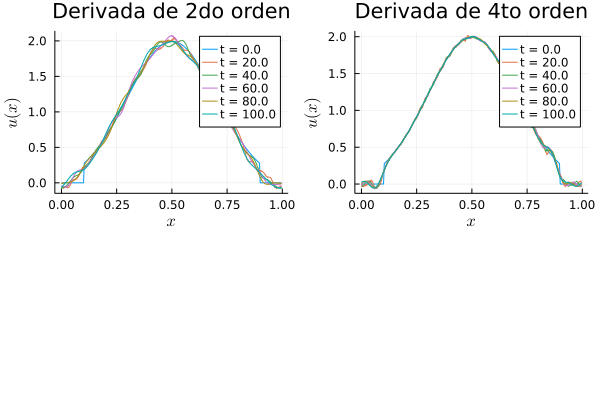

In [21]:
# Ploteamos
plt2 = plot()
for i in 0:2:10
    plot!(plt2,x,sol2(T*0.1*i)[:,1],label="t = $(T*0.1*i)",
            title="Derivada de 2do orden",
            xlabel="\$x\$",ylabel="\$u(x)\$")
end

plt4 = plot()
for i in 0:2:10
    plot!(plt4,x,sol4(T*0.1*i)[:,1],label="t = $(T*0.1*i)",
            title="Derivada de 4to orden",
            xlabel="\$x\$",ylabel="\$u(x)\$")
end

# plt6 = plot()
# for i in 0:2:10
#     plot!(plt6,x,sol6(T*0.1*i)[:,1],label="t = $(T*0.1*i)")
# end
# title!("Derivada de 6to orden");xlabel!("\$x\$");ylabel!("\$u(x)\$");

# plt8 = plot()
# for i in 0:2:10
#     plot!(plt8,x,sol8(T*0.1*i)[:,1],label="t = $(T*0.1*i)")
# end
# title!("Derivada de 8vo orden");xlabel!("\$x\$");ylabel!("\$u(x)\$");

#plot!(title="hola",plt2,plt4,plt6,plt8,layout=4)
plot!(plt2,plt4,layout=4)

**3)** Cambie el integrador temporal. ¿Qué sucede si usa Euler? Explique.

In [39]:
include("../../modules/module_wave_equation_finite_differences.jl")

Q (generic function with 1 method)

In [187]:
Nx=500;                     # Numeros de puntos en la discretización espacial
L=1.0;                      # Intervalo espacial
dx=L/Nx;                    # dx
T=1.;                       # Tiempo final
dt=0.4*dx;                  # Tomamos dt ≈ dx/speed_max, para mantener la condición CFL y
                            # Garantizar la estabilidad del algoritmo.
r0=zeros(Nx,2);             # Discretización de los campos u y v
x=[dx*i for i in 0:Nx-1];   # Coordenadas x, necesarias para determinar el dato inicial.

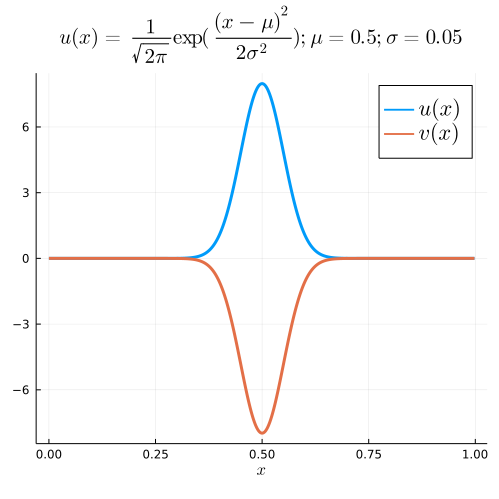

In [188]:
# parámetros iniciales
x0=0.1;x1=0.9;      # ventana
u = @view r0[:,1];
v = @view r0[:,2];

# definimos una función gaussiana para C.I.
function gaussian_function(x,σ,μ)
    return (1.0/(σ*sqrt(2*π)))*exp(-0.5*((x-μ)/σ)^2)
end

μ=0.5*L;σ=0.05;
for i in 1:Nx
    if ((x[i] > x0) && (x[i] < x1))
        u[i] = gaussian_function(x[i],σ,μ);
        #u[i] = (x[i]-x0)^8*(x[i]-x1)^8/(0.5*(x1-x0))^16
        v[i] = -u[i];
    end
end

plot(x,r0,label=["\$u(x)\$" "\$v(x)\$"],xlabel="\$x\$",legendfontsize=15,lw=3)
title!("\$u(x)=\\frac{1}{\\sqrt{2π}}\\exp(\\frac{(x-μ)^2}{2σ^2});μ=$(μ);σ=$(σ)\$")

In [189]:
D4=create_D_4_per(Nx);
sol4=resolve_EDO_space(D4,dx,dt,F!,r0,T,Euler);

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /home/mendez/.julia/packages/SciMLBase/5euVO/src/integrator_interface.jl:512


Plots.AnimatedGif("/tmp/jl_W3S3EduVwd.gif")
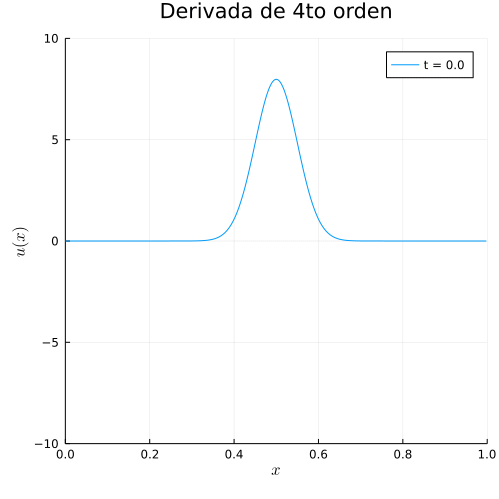

┌ Info: Saved animation to 
│   fn = /tmp/jl_W3S3EduVwd.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


In [190]:
anim = @animate for i in 0:100
    plot(x,sol4(T*0.01*i)[:,1],label="t = $(T*0.01*i)",
            title="Derivada de 4to orden",
            xlabel="\$x\$",ylabel="\$u(x)\$",ylim=(-10.0,10.0),xlim=(0.0,1.0))
end
display(gif(anim,fps=20))

In [192]:
function indicador_estabilidad(Nx,α,L,func,Method)

    Δx=L/Nx;                    # dx
    CI=zeros(Nx,2);             # Discretización de los campos u y v
    xx=[Δx*i for i in 0:Nx-1];   # Coordenadas x, necesarias para determinar el dato inicial.

    # parámetros iniciales
    x0=0.1;x1=0.9;      # ventana

    μ=0.5*L;σ=0.05;
    for i in 1:Nx
        if ((xx[i] > x0) && (xx[i] < x1))
            CI[i,1] = gaussian_function(xx[i],σ,μ);
            CI[i,2] = -CI[i,1];
        end
    end

    # Intervalo de tiempo
    T=1.0;Δt=α*Δx
    time_tuple = (0.0,T)    # tupla con intervalo temporal
    FinDiffOp=create_D_4_per(Nx);

    param_tuple = (Δx, FinDiffOp) # tupla con parámetros

    # Seteamos el problema  (tomamos λ = param_tuple)
    prob = ODEProblem(func,CI,time_tuple,param_tuple)
    
    # Inicializamos el integrador y damos un paso
    # (Lo hacemos de esta manera porque sólo nos interesa dar un paso)
    
    integrator = init(prob,Method(),dt=Δt,adaptive=false)
    step!(integrator)
    
    #Tomamos el valor de la función después del paso
    uf = maximum(integrator.u[:,1])/maximum(CI[:,1])
        
    #return abs(uf) > 1. ? 0.0 : 1.0 # ESTÁ BIEN ESTO
    return abs(uf) <= 1. ? 1. : 0.
end

indicador_estabilidad (generic function with 4 methods)

In [193]:
default(size=(500,500), fc=:heat)
x = 2:10:500
y = 0.01:0.01:1.0

0.01:0.01:1.0

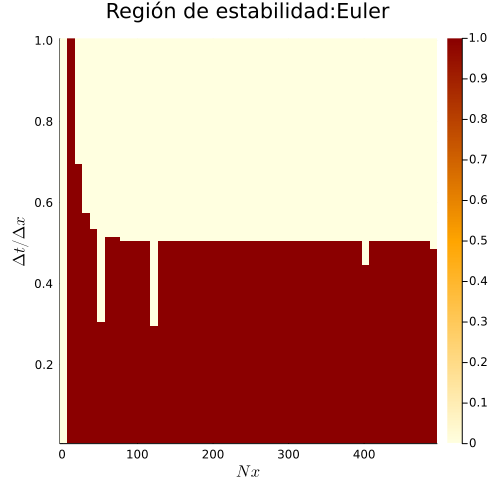

In [194]:
heatmap(x,y,(x,y)->indicador_estabilidad(x,y,1.0,F!,Euler),
xlabel="\$Nx\$",
ylabel="\$Δt/Δx\$",
title="Región de estabilidad:Euler")#xticks=0:100:500

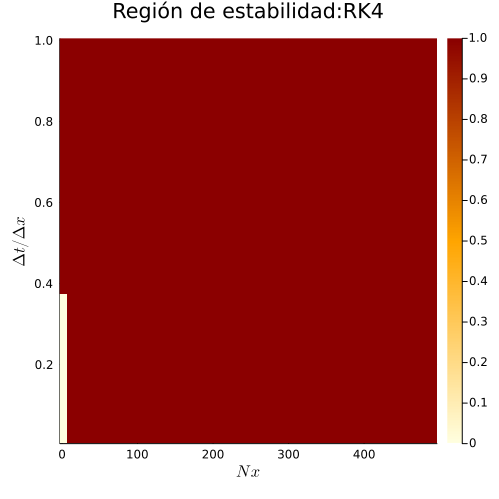

In [195]:
heatmap(x,y,(x,y)->indicador_estabilidad(x,y,1.0,F!,RK4),
xlabel="\$Nx\$",
ylabel="\$Δt/Δx\$",
title="Región de estabilidad:RK4")#xticks=0:100:500

**4)** Grafique los errores con distintas resoluciones y diferencias finitas. 

In [11]:
function absolute_error(exact_sol,aprox_sol)
    ϵabs .= (abs(exact_sol .- aprox_sol) ./ exact_sol) .* 100.0
    return ϵabs
end

absolute_error (generic function with 1 method)

**5)** Haciendo diferencias de aproximaciones con distintas resoluciones y tomando normas apropiadas, vea cual es el orden de convergencia del método.

In [12]:
#Función de ayuda:
function Q(sol1, sol2, sol4, t, i)
    return norm(sol1(t)[1:end,i] - sol2(t)[1:2:end,i])/norm(sol2(t)[1:2:end,i] - sol4(t)[1:4:end,i])
end
#= Modo de uso:
Q(sol1,sol2,sol4,dt,1)
plot(sol1.t,map(x -> Q(sol1,sol2,sol4,x,1), sol1.t))
=#

Q (generic function with 1 method)

**6)** Codifique la ecuación de burgers, $\frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x}$ y evolucione. Describa que sucede y explique.

In [93]:
include("../../modules/module_wave_equation_finite_differences.jl")

Q (generic function with 1 method)

In [94]:
Nx=100;                     # Numeros de puntos en la discretización espacial
L=1.;                      # Intervalo espacial
dx=L/Nx;                    # dx
T=.16;                    # Tiempo final
dt=1.0*dx;                  # Tomamos dt ≈ dx/speed_max, para mantener la condición CFL y
                            # Garantizar la estabilidad del algoritmo.
r0=zeros(Nx);             # Discretización de los campos u y u²
x=[dx*i for i in 0:Nx-1];   # Coordenadas x, necesarias para determinar el dato inicial.

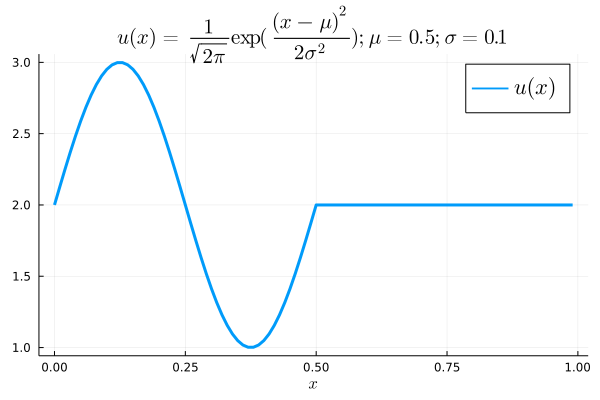

In [95]:
# parámetros iniciales
x0=0.0;x1=0.5;      # ventana
u = @view r0[:];

# definimos una función gaussiana para C.I.
function gaussian_function(x,σ,μ)
    return (1.0/(σ*sqrt(2*π)))*exp(-0.5*((x-μ)/σ)^2)
end

function g_e(x,L)
    if x >= L/2 && x <= L return 1.
    else return 0
    end
end

μ=0.5*L;σ=0.1;
for i in 1:Nx
    #x[i]=dx*(i-1)
    if ((x[i] > x0) && (x[i] < x1))
        #u[i] = gaussian_function(x[i],σ,μ);
        #u[i] = -(x[i]-x0)^8*(x[i]-x1)^8/(0.5*(x1-x0))^16
        #u[i]=g_e(x[i],L)
        u[i]=sin((x[i]*2.0*π)/(x1-x0))+2.0
        #u[i]=1.0
    else
        u[i]=2.0
    end
end

plot(x,r0,label=["\$u(x)\$" "\$v(x)\$"],xlabel="\$x\$",legendfontsize=15,lw=3)
title!("\$u(x)=\\frac{1}{\\sqrt{2π}}\\exp(\\frac{(x-μ)^2}{2σ^2});μ=$(μ);σ=$(σ)\$")

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://diffeq.sciml.ai/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /home/mendez/.julia/packages/SciMLBase/5euVO/src/integrator_interface.jl:491
┌ Warning: dt(2.220446049250313e-16) <= dtmin(2.220446049250313e-16) at t=1.7005592121647408. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/mendez/.julia/packages/SciMLBase/5euVO/src/integrator_interface.jl:505

In [99]:
# D2=create_D_2_per(Nx);
# sol2=resolve_EDO_space(D2,dx,dt,Burgers!,r0,T,Tsit5);

D4=create_D_4_per(Nx);
@btime resolve_EDO_space(D4,dx,dt,Burgers!,r0,T,RK4);
sol4=resolve_EDO_space(D4,dx,dt,Burgers!,r0,T,RK4);

  338.689 μs (743 allocations: 527.20 KiB)


In [100]:
D4=create_D_4_per(Nx);
@btime resolve_EDO_space(D4,dx,dt,Burgers_Crapodina!,r0,T,RK4);
sol4crap=resolve_EDO_space(D4,dx,dt,Burgers_Crapodina!,r0,T,RK4);

  700.634 μs (2011 allocations: 1.59 MiB)


Plots.AnimatedGif("/tmp/jl_E5obWPwVct.gif")
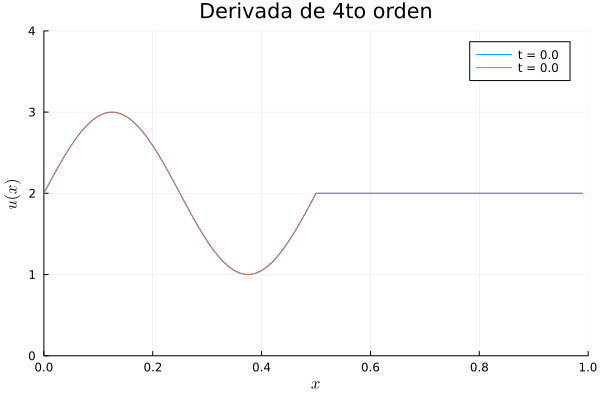

┌ Info: Saved animation to 
│   fn = /tmp/jl_E5obWPwVct.gif
└ @ Plots /home/mendez/.julia/packages/Plots/lW9ll/src/animation.jl:137


In [101]:
anim = @animate for i in 0:100
    plot(x,sol4(T*0.01*i)[:],label="t = $(T*0.01*i)",
            title="Derivada de 4to orden",
            xlabel="\$x\$",ylabel="\$u(x)\$",ylim=(0.0,4.0),xlim=(0.0,1.0))
    plot!(x,sol4crap(T*0.01*i)[:],label="t = $(T*0.01*i)",
        title="Derivada de 4to orden",
        xlabel="\$x\$",ylabel="\$u(x)\$",ylim=(0.0,4.0),xlim=(0.0,1.0))
end
display(gif(anim,fps=20))

In [40]:
plt2 = plot()
for i in 0:2:10
    plot!(plt2,x,sol2(T*0.1*i)[:],label="t = $(T*0.1*i)",
            title="Derivada de 2do orden",
            xlabel="\$x\$",ylabel="\$u(x)\$")
end

plt4 = plot()
for i in 0:2:10
    plot!(plt4,x,sol4(T*0.1*i)[:],label="t = $(T*0.1*i)",
            title="Derivada de 4to orden",
            xlabel="\$x\$",ylabel="\$u(x)\$")
end

plot!(plt2,plt4,layout=2)

**7)** **Para los ambiciosos:** a) codifique otras ecuaciones; b) implemente disipación de Kreiss-Oliger; c) incorpore fuentes; d) vea sistemas con distintas escalas temporales; e) para este último caso implemente métodos IMEX de integración temporal; f) trate de optimizar el método numérico para hacerlo más eficiente.
Un ejemplo de un sistema con distintas escalas temporales es:
$$
\begin{align}
u_t &= v_x \\
v_t &= u_x + \frac{1}{\epsilon} (u_x - v)
\end{align}
$$
with $\epsilon > 0$ muy pequeño.